<a href="https://colab.research.google.com/github/Mariyselita/TLN/blob/main/TLN_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filepath = '/content/drive/My Drive/TLN/e990624_mod.htm'

In [6]:
with open(filepath, 'r', encoding='utf-8') as file:
    content = file.read()

In [9]:
import pandas as pd
from bs4 import BeautifulSoup
import re

In [10]:
# Usar BeautifulSoup para extraer texto del HTML
soup = BeautifulSoup(content, 'html.parser')
text = soup.get_text(separator=' ')

# Crear un DataFrame
data = pd.DataFrame({'text': [text]})

# Remover puntuación y convertir a minúsculas
data['text_processed'] = data['text'].map(lambda x: re.sub('[,\.!?]', '', x))
data['text_processed'] = data['text_processed'].map(lambda x: x.lower())

# Ver las primeras filas del texto procesado
print(data['text_processed'].head())

0    \n \n \n \n e990624_modhtm \n \n \n\nhttp://ww...
Name: text_processed, dtype: object


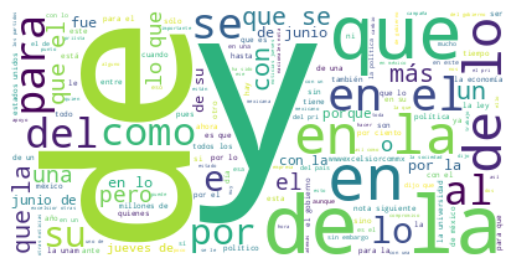

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir el texto procesado
long_string = ' '.join(data['text_processed'].values)

# Crear un objeto WordCloud
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generar la nube de palabras
wordcloud.generate(long_string)

# Visualizar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('spanish')
stop_words.extend(['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_words = list(sent_to_words(data['text_processed'].values.tolist()))
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['http', 'art', 'html', 'excelsior', 'editorial', 'jueves', 'junio', 'epigrama', 'jorge', 'mansilla', 'torres', 'hombre', 'empezo', 'hablar', 'hace', 'dos', 'medio', 'millones', 'anos', 'segun', 'neurobiologo', 'terry', 'deacon', 'universidad', 'harvard', 'tiempo', 'espanto', 'si', 'quiere', 'suponer']


In [13]:
import gensim.corpora as corpora

# Crear diccionario
id2word = corpora.Dictionary(data_words)

# Crear el corpus
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

# Ver el corpus
print(corpus[:1][0][:30])

# Entrenar el modelo LDA
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Imprimir los temas del modelo LDA
from pprint import pprint
pprint(lda_model.print_topics())

[(0, 2), (1, 8), (2, 2), (3, 2), (4, 2), (5, 4), (6, 4), (7, 2), (8, 2), (9, 2), (10, 2), (11, 8), (12, 2), (13, 2), (14, 4), (15, 2), (16, 6), (17, 2), (18, 6), (19, 4), (20, 2), (21, 6), (22, 4), (23, 2), (24, 6), (25, 4), (26, 2), (27, 2), (28, 2), (29, 2)]
[(0,
  '0.006*"mas" + 0.005*"gobierno" + 0.004*"mexico" + 0.004*"si" + '
  '0.003*"jueves" + 0.003*"pais" + 0.003*"excelsior" + 0.003*"junio" + '
  '0.002*"millones" + 0.002*"anos"'),
 (1,
  '0.007*"mas" + 0.006*"mexico" + 0.004*"gobierno" + 0.003*"si" + '
  '0.003*"junio" + 0.003*"anos" + 0.003*"nacional" + 0.003*"pais" + '
  '0.003*"siguiente" + 0.002*"dijo"'),
 (2,
  '0.005*"mas" + 0.004*"mexico" + 0.004*"gobierno" + 0.004*"si" + '
  '0.003*"junio" + 0.003*"anos" + 0.002*"http" + 0.002*"html" + 0.002*"jueves" '
  '+ 0.002*"economico"'),
 (3,
  '0.005*"mas" + 0.004*"mexico" + 0.004*"gobierno" + 0.003*"si" + '
  '0.003*"junio" + 0.003*"html" + 0.003*"anos" + 0.002*"pais" + 0.002*"dijo" + '
  '0.002*"economico"'),
 (4,
  '0.007*"

In [15]:
!pip install pyLDAvis
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.7 MB/s eta 0:00:00


In [16]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

# Visualizar los temas
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

# Guardar y cargar los datos pre-preparados de pyLDAvis
LDAvis_data_filepath = '/content/drive/My Drive/TLN/ldavis_prepared_'+str(num_topics)+'.html'
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.000718 -0.000229       1        1  61.656558
9      0.001497 -0.000591       2        1  30.468830
4      0.001384 -0.000347       3        1   5.303559
2     -0.000133  0.001570       4        1   1.249422
6      0.000265  0.001267       5        1   1.044742
8     -0.000650  0.001064       6        1   0.160003
0     -0.000194  0.000475       7        1   0.081126
5      0.000430 -0.001625       8        1   0.035411
3     -0.001261 -0.000474       9        1   0.000174
7     -0.002057 -0.001111      10        1   0.000174, topic_info=           Term        Freq       Total Category  logprob  loglift
5168        mas  429.000000  429.000000  Default  30.0000  30.0000
5320     mexico  320.000000  320.000000  Default  29.0000  29.0000
3995   gobierno  221.000000  221.000000  Default  28.0000  28.0000
7651         si  200.000000  200.000000  Default  27.0000  27.0000
4770      junio  172.000000  172.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
3504  excelsior    0.000195  137.563759  Topic10  -6.2445  -0.2054
2725       dijo    0.000193  135.162416  Topic10  -6.2565  -0.1998
2914  economico    0.000175  128.652527  Topic10  -6.3523  -0.2462
5975      parte    0.000165  107.701345  Topic10  -6.4087  -0.1249
6514        pri    0.000165  127.527742  Topic10  -6.4099  -0.2950

[859 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
32        1  0.433750   abrace
32        2  0.433750   abrace
42        1  0.450647  abrirse
42        2  0.450647  abrirse
61        1  0.651165    acabo
...     ...       ...      ...
8657      2  0.342524     york
8657      3  0.048932     york
8672      1  0.540600   zepeda
8672      2  0.324360   zepeda
8672      3  0.108120   zepeda

[1342 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 5, 3, 7, 9, 1, 6, 4, 8])